## 1. R-CNN Example:

This is an example from this tutorial: https://gluon-cv.mxnet.io/build/examples_detection/demo_faster_rcnn.html

In [1]:
! pip install gluoncv

     |████████████████████████████████| 752 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 4.3 MB/s  eta 0:00:01


In [2]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

Let’s get an Faster RCNN model trained on Pascal VOC dataset with ResNet-50 backbone.

In [3]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

121888KB [00:05, 23288.37KB/s]                            


For RCNN, short edge of the picture is resized to 600px.

In [4]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

100%|██████████| 244/244 [00:00<00:00, 13821.65KB/s]


Let's get the prediction.

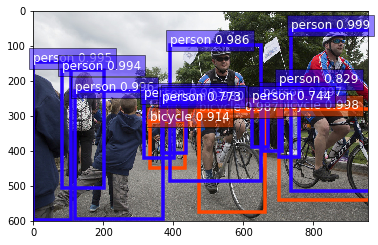

In [5]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

## 2. YOLO Example:
This is an example from this tutorial: https://gluon-cv.mxnet.io/build/examples_detection/demo_yolo.html

In [6]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [7]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:08, 24922.32KB/s]                            


Here we specify that we resize the short edge of the image to 512 px. You can feed an arbitrarily sized image. Once constraint for YOLO is that input height and width can be divided by 32.

In [8]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

100%|██████████| 160/160 [00:00<00:00, 9652.76KB/s]

Shape of pre-processed image: (1, 3, 512, 683)


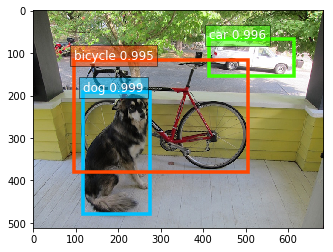

In [9]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()